# Explaining Models with Shap
- Amber Kutscher

# Load Your Saved Joblib File

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import joblib
loaded_joblib = joblib.load('best-models.joblib')
loaded_joblib.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'RandomForestRegressor'])

In [2]:
X_train_df = loaded_joblib['X_train']
y_train = loaded_joblib['y_train']
X_test_df = loaded_joblib['X_test']
y_test = loaded_joblib['y_test']
preprocessor = loaded_joblib['preprocessor']
rf_reg = loaded_joblib['RandomForestRegressor']
lin_reg = loaded_joblib['LinearRegression']

# Explain your tree-based model with shap:

In [3]:
import shap
shap.initjs()

## Create an X_shap and y_shap variable from your training data (use shap.sample as needed).

In [4]:
len(X_train_df)

6392

In [5]:
# Create an X_shap variable
X_shap = shap.sample(X_train_df, nsamples=1000, random_state=321)
X_shap.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP
4469,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,7.72,0.074669,76.3986
4438,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5.11,0.034868,163.8210
366,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,8.05,0.078386,256.4646
2219,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,8.76,0.050131,128.3336
6080,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,6.59,0.176748,82.7908


In [6]:
# Get the corresponding y_shap variables
y_shap = y_train.loc[X_shap.index]
y_shap

4469    1402.1748
4438    2120.5730
366     5153.2920
2219    2556.6720
6080      83.8908
          ...    
7193    2037.3480
4376     195.7452
6680    3723.1536
4956    4566.7222
2308     640.4996
Name: Item_Outlet_Sales, Length: 1000, dtype: float64

## Create a model explainer.

In [7]:
# Create a SHAP explainer using the model
explainer = shap.Explainer(rf_reg)
explainer

## Calculate the shap values for your model.

In [8]:
# Get SHAP values from explainer for training data
shap_values = explainer(X_shap, y_shap)
type(shap_values)

shap._explanation.Explanation

In [9]:
X_shap.shape

(1000, 32)

In [10]:
shap_values.shape

(1000, 32)

## Create a summary plot - with plot_type='bar'

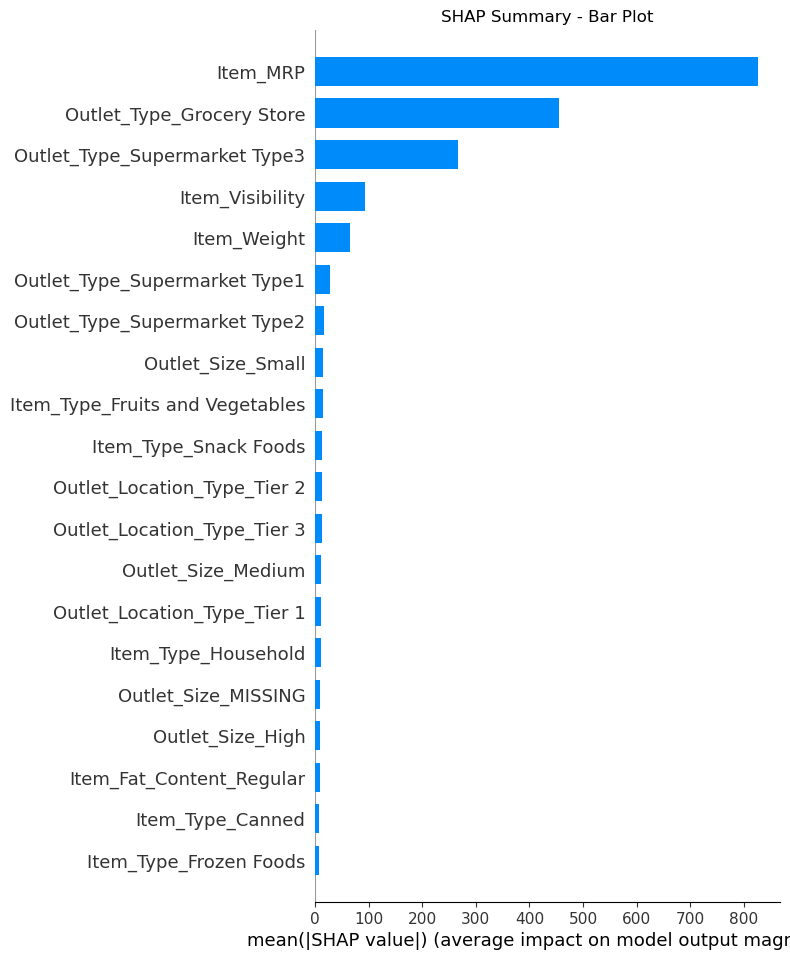

In [11]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values, features=X_shap, plot_type='bar', show=False)
ax.set_title('SHAP Summary - Bar Plot');
fig.savefig('Images/shap_bar_plot.png')

![RandomForest](Figures/randomforest_coeffs.png)

### Compare the most important features according to SHAP vs. your original feature importances. Are they the same features in both? If not, what's different?

- The most important features according to SHAP are:
    - Item_MRP
    - Outlet_Type_Grocery Store
    - Outlet_Type_Supermarket Type3
    - Item_Visibility
    - Item_Weight

- In comparison, the 5 most important features from our original model are:
    - Item_MRP
    - Outlet_Type_Grocery Store
    - Item_Visibility
    - Outlet_Type_Supermarket Type3
    - Item_Weight

As can be seen, the most important features according to both models are the same, however the order is a bit different.

## Create a second summary plot - with plot_type='dot'

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


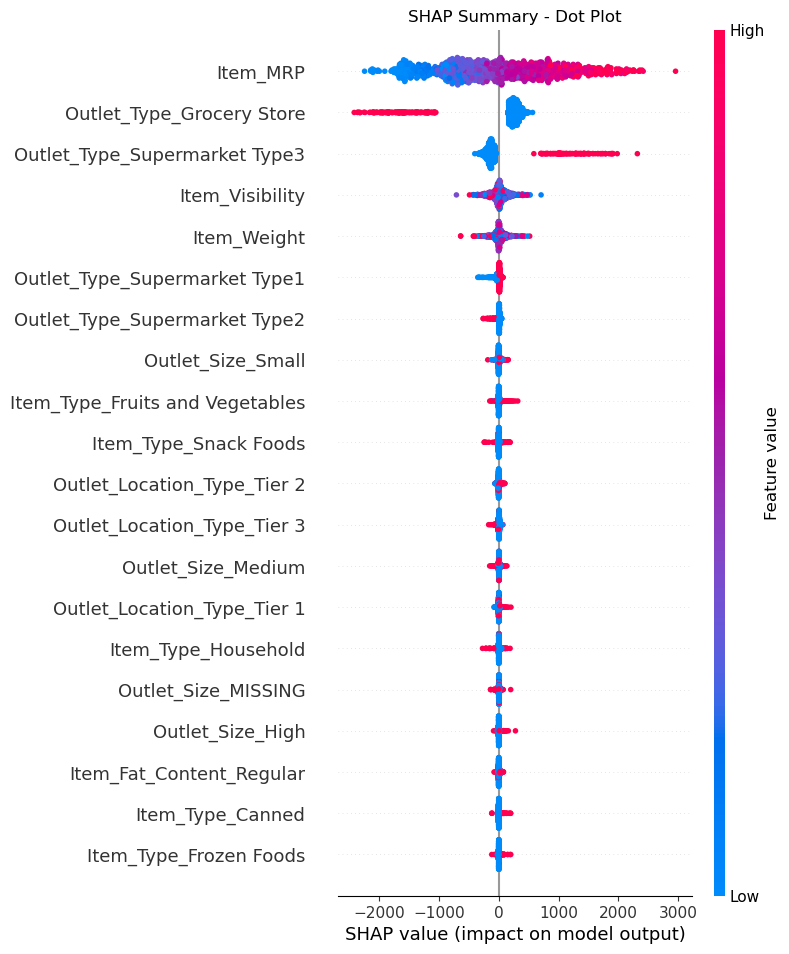

In [12]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values, features=X_shap, plot_type='dot', show=False)
ax.set_title('SHAP Summary - Dot Plot');
fig.savefig('Images/shap_dot_plot.png')

### Interpret the top 3 most important features and how they influence your model's predictions.

- As per the SHAP ummary - Dot Plot, the 3 most important features are:
    - "Item_MRP" -- As a products list price or Item MRP increases, its overall item outlet sales also increase.
    - "Outlet_Type_Grocery Store" -- Grocery Stores have less of an impact on item outlet sales than Supermarkets do.
    - "
Outlet_Type_Supermarket Type" -- Of the 3 types of supermarkets, Supermarket Type3 has the highest financial impact on item outlet sales. Perhaps these are the largest of the 3.3